# Amino acid sequence analysis
### K02567 (nap)

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib import gridspec
import tqdm.notebook as tqdm

from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqUtils.ProtParam import ProteinAnalysis
from Bio.SeqRecord import SeqRecord

In [2]:
KO_NUMBER = "K02567"

ORF_FPATH = f"../out/aaseqs/orf_sequences_{KO_NUMBER}_90.tsv" # path to ORF seqs

OUTDIR = f"../out/aaseqs/{KO_NUMBER}"
os.makedirs(OUTDIR, exist_ok=True)

In [3]:
AA_LIST = sorted([
    'A',  # Alanine
    'R',  # Arginine
    'N',  # Asparagine
    'D',  # Aspartic acid
    'C',  # Cysteine
    'E',  # Glutamic acid
    'Q',  # Glutamine
    'G',  # Glycine
    'H',  # Histidine
    'I',  # Isoleucine
    'L',  # Leucine
    'K',  # Lysine
    'M',  # Methionine
    'F',  # Phenylalanine
    'P',  # Proline
    'S',  # Serine
    'T',  # Threonine
    'W',  # Tryptophan
    'Y',  # Tyrosine
    'V',  # Valine
])
AA_TO_IDX = {aa: i for i, aa in enumerate(AA_LIST)}

In [4]:
# Load the aa sequence data
DF_SEQ = pd.read_csv(ORF_FPATH, delimiter="\t").set_index("orf")
DF_SEQ

,aa_sequence
orf,
Soil11.scaffold_222086193_c1_1,LANETFIQKHVNFKKGLTQIGYGVEDNFEYGGSSEPSWKTYRPFAD...
Soil11.scaffold_37140770_c1_1,MAAPRTIKTTCPYCGVGCGVLADIGPDGVSVRGDPNHPANFGRLCS...
Soil11.scaffold_240683483_c1_1,MEPRMDQQLTIDGEPDRWIHSACLLCSNGCGIDIAVKDERIVGVRG...
Soil12.scaffold_321529328_c1_1,MGPNQHTRGTAMNSLLHGLHLLSGHFGKPGDAPTSLTGQPSACGTV...
Soil12.scaffold_446288179_c1_1,LYGDPKRKVMSVWCMGFNQHTRGTWINNLVYNIHLLVGKIATPGNS...
...,...
T0.scaffold_785029462_c1_5,MDRRSLLKKLAAASAISAAESLLPGVVFATEDKSAPSIRDVAWKKS...
T0.scaffold_170828508_c1_1,NNLVHNLHLLTGKICRPGNTPFSLTGQPSACGSIREVGALSHLLPA...
T0.scaffold_61541039_c1_1,TNAGTRRIVGIQGDPDHPANFGGLCTKGRALPETTHSTVGRALQPE...


In [5]:
# Compute sequence lengths, and whether the sequence is complete.
DF_SEQ["length"] = DF_SEQ["aa_sequence"].map(len)
DF_SEQ["start_codon"] = DF_SEQ["aa_sequence"].map(lambda x: x[0] == "M")
DF_SEQ["stop_codon"] = DF_SEQ["aa_sequence"].map(lambda x: x[-1] == "*")
DF_SEQ["complete"] = DF_SEQ["start_codon"] & DF_SEQ["stop_codon"]
DF_SEQ

,aa_sequence,length,start_codon,stop_codon,complete
orf,,,,,
Soil11.scaffold_222086193_c1_1,LANETFIQKHVNFKKGLTQIGYGVEDNFEYGGSSEPSWKTYRPFAD...,468,False,False,False
Soil11.scaffold_37140770_c1_1,MAAPRTIKTTCPYCGVGCGVLADIGPDGVSVRGDPNHPANFGRLCS...,156,True,False,False
Soil11.scaffold_240683483_c1_1,MEPRMDQQLTIDGEPDRWIHSACLLCSNGCGIDIAVKDERIVGVRG...,512,True,False,False
Soil12.scaffold_321529328_c1_1,MGPNQHTRGTAMNSLLHGLHLLSGHFGKPGDAPTSLTGQPSACGTV...,334,True,False,False
Soil12.scaffold_446288179_c1_1,LYGDPKRKVMSVWCMGFNQHTRGTWINNLVYNIHLLVGKIATPGNS...,171,False,False,False
...,...,...,...,...,...
T0.scaffold_785029462_c1_5,MDRRSLLKKLAAASAISAAESLLPGVVFATEDKSAPSIRDVAWKKS...,770,True,True,True
T0.scaffold_170828508_c1_1,NNLVHNLHLLTGKICRPGNTPFSLTGQPSACGSIREVGALSHLLPA...,329,False,False,False
T0.scaffold_61541039_c1_1,TNAGTRRIVGIQGDPDHPANFGGLCTKGRALPETTHSTVGRALQPE...,264,False,False,False


In [6]:
print(f"Found {np.sum(DF_SEQ["complete"])}/{len(DF_SEQ)} sequences beginning "
      "with start codon (M) and ending with stop codon (*)")

COMPLETE_DF = DF_SEQ.loc[DF_SEQ["complete"]]
COMPLETE_DF

Found 11/95 sequences beginning with start codon (M) and ending with stop codon (*)


,aa_sequence,length,start_codon,stop_codon,complete
orf,,,,,
Soil14.scaffold_111947747_c1_15,MDRRDFLKGTAMAAATLAASRLAYGQDKAAVEPSIAARHGNGVQWH...,807,True,True,True
Soil15.scaffold_991210343_c1_3,MDRRDFLKTTAMTAATLAASRLAYGQTPGAAPPAVSAASGGVKWNK...,804,True,True,True
Soil15.scaffold_1131791871_c1_2,MERREFLKYSAMGTATVAASRLALGKDAVAAAEAAPVTTDVVWNKA...,804,True,True,True
Soil16.scaffold_833218104_c1_9,MKFTRREFLKSMAVATALVSSGCSSDTGGAKMQGPTSQQDVEKWVK...,754,True,True,True
Soil16.scaffold_48033301_c1_9,MTRREMLTRMAATAAISAAEAVFPGIVFAAAPDKTFSPSAVEWKKT...,770,True,True,True
Soil3.scaffold_374008697_c1_11,MRFSRRDFLKAIAVSTALVSSGCSLDSGGRGMQGPTTQQDVEKWFK...,754,True,True,True
Soil5.scaffold_42391532_c1_4,MELSRRSFLQAAAAAAATAAALSATGCADKKANLKSDLPADLKWDK...,757,True,True,True
Soil5.scaffold_243654554_c1_4,MGLTRRDFLKATAAAAAFAAAGATALNPLKPGVAEASEGGLEWGKA...,773,True,True,True
Soil9.scaffold_399115430_c1_5,MAITRREFLKAAVTIGVATSGGMGAPELLTVSEAEAQQAAESWQKA...,789,True,True,True


In [7]:
complete_seqs = COMPLETE_DF["aa_sequence"].values
for s in complete_seqs:
    print(s)

MDRRDFLKGTAMAAATLAASRLAYGQDKAAVEPSIAARHGNGVQWHKAPCRFCGTGCHVQVGVQSGKVVAIAGDQKAPVNKGLLCVKGYHVGLALYGQDRLTTPLLRKGDRQVPISWEEAIDLIARRVLKDPKGFAVYGSGQWTIPEGYAASKFVKAGLGTHNLDANARLCMASAVTGFLATYGVDEPAGCYDDLDACDVLIMWGNNPAEMHPVLFSRVIDRRSRGEKVTLIDIGTRKTRTSGFCDDSFRFKPNSDLAIACGIAHLLVENGTYDKAFVEANCAFRAASTPPTLEGKAITFEEYRKLLEPYTPEKVEQLSGVSAKDLRMLAELFGRRDLRITSLWCMGPNQHTRGTAMNSLLHGLHLLSGHFGKPGDAPTSLTGQPSACGTVREVGTLSHALPGGRVVAKAEHRAQMEEIWNVPAGRVSDKVGYHTVELWKRFSTPTDKGGDIHTVWVQVTNPAQSLPNTHELVDPSRELEDKFLIVSDVYPTATTRLADLVLPSAMWVEKNGMVGNSERRTQQWFKMVQPPGQARDDAWQTVAVAHRLLELGFAGMKDKDGRFLFEVKGQDGKPVPTWEWAHYYDVNVDAHLFEEYRKTTRIKHKDLAPYQEYVKARGLRWPVVEQPDGSWRETRFRFAGFDDPYVKKGRAIQFYHSPSHDDRAQIWFQPYEPPPESPDADFPFWLCTGRVIEHWHTGSVTMRIPQLRRAMPQAYVEMNRADARRLGVENGDWVTVETRRGKLDLPVWLGGRGEPVEGSLFVPFFDERLLINGLTLDEHDPFSKQPDYKKCAARVRRRERIAEKQG*
MDRRDFLKTTAMTAATLAASRLAYGQTPGAAPPAVSAASGGVKWNKAPCRFCGTGCHVQVGVEGGKVVAIAGDPKAEVNKGLLCVKGYHVGLALYGSDRLTQPLLRKGDTQVPISWDEALDIIAARIQKDPKGFGLYGSGQWTIPEGYTASRFVKGGLGTNQLDANARLCMSSAVTGFLATYGVDEPAGCYD

### Compute some simple stats

Look at the lengths of all amino acid sequences, then the subset of complete amino acids.

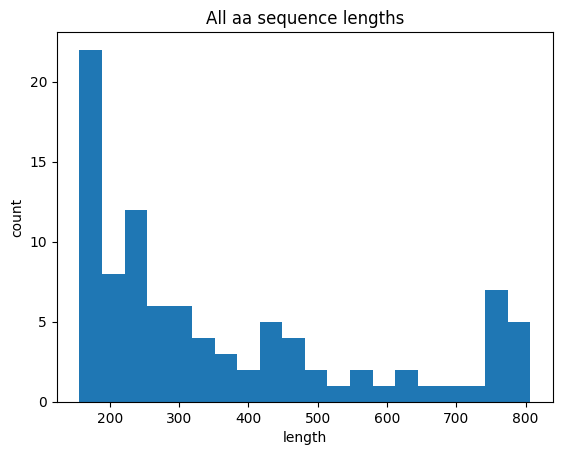

In [8]:
fig, ax = plt.subplots(1, 1)
ax.hist(DF_SEQ["length"], bins=20)

ax.set_xlabel(f"length")
ax.set_ylabel(f"count")
ax.set_title(f"All aa sequence lengths");

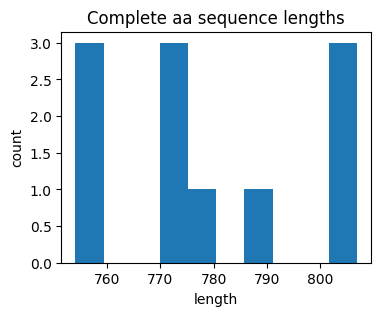

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(4,3))

ax.hist(COMPLETE_DF["length"], bins=10)
ax.set_xlabel(f"length")
ax.set_ylabel(f"count")

ax.set_title(f"Complete aa sequence lengths");

Let's us `Biopython` to get some additional information about each sequence.

In [10]:
# Initialize the instability and p[AA] columns
DF_SEQ['instability'] = None
for aa in AA_LIST:
    DF_SEQ['p' + aa] = 0.

# Compute instability index and percent composition for each amino acid
for idx, row in DF_SEQ.iterrows():
    seq = row['aa_sequence']
    seq = Seq(seq[0:-1] if seq[-1] == '*' else seq) # Don't include final '*'
    res = ProteinAnalysis(seq)
    aa_comp = res.amino_acids_percent
    for aa in aa_comp:
        p = aa_comp.get(aa, 0.)
        DF_SEQ.loc[idx, 'p' + aa] = p
    instability = res.instability_index()
    DF_SEQ.loc[idx, 'instability'] = instability

DF_SEQ

,aa_sequence,length,start_codon,stop_codon,complete,instability,pA,pC,pD,pE,...,pM,pN,pP,pQ,pR,pS,pT,pV,pW,pY
orf,,,,,,,,,,,,,,,,,,,,,
Soil11.scaffold_222086193_c1_1,LANETFIQKHVNFKKGLTQIGYGVEDNFEYGGSSEPSWKTYRPFAD...,468,False,False,False,34.351944,8.547009,0.213675,4.059829,7.264957,...,1.495726,3.632479,6.410256,2.564103,7.478632,3.846154,6.196581,6.410256,2.991453,4.273504
Soil11.scaffold_37140770_c1_1,MAAPRTIKTTCPYCGVGCGVLADIGPDGVSVRGDPNHPANFGRLCS...,156,True,False,False,25.729551,12.179487,3.205128,8.333333,3.205128,...,1.923077,3.846154,5.769231,1.282051,5.128205,5.769231,5.128205,7.051282,0.641026,4.487179
Soil11.scaffold_240683483_c1_1,MEPRMDQQLTIDGEPDRWIHSACLLCSNGCGIDIAVKDERIVGVRG...,512,True,False,False,36.935586,9.765625,1.757812,7.031250,5.078125,...,2.734375,4.492188,5.273438,3.710938,6.835938,4.882812,5.664062,7.617188,1.757812,1.953125
Soil12.scaffold_321529328_c1_1,MGPNQHTRGTAMNSLLHGLHLLSGHFGKPGDAPTSLTGQPSACGTV...,334,True,False,False,33.173982,6.886228,0.299401,6.586826,5.988024,...,2.095808,2.395210,7.784431,4.491018,6.586826,4.790419,6.287425,8.383234,3.293413,2.994012
Soil12.scaffold_446288179_c1_1,LYGDPKRKVMSVWCMGFNQHTRGTWINNLVYNIHLLVGKIATPGNS...,171,False,False,False,24.955556,7.017544,1.169591,5.263158,2.923977,...,4.093567,5.263158,7.602339,1.754386,7.017544,3.508772,8.187135,9.941520,2.923977,2.339181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
T0.scaffold_785029462_c1_5,MDRRSLLKKLAAASAISAAESLLPGVVFATEDKSAPSIRDVAWKKS...,770,True,True,True,33.475826,7.802341,1.300390,5.591678,5.721717,...,3.120936,4.161248,6.371912,2.210663,7.022107,5.981795,4.811443,8.192458,2.470741,3.250975
T0.scaffold_170828508_c1_1,NNLVHNLHLLTGKICRPGNTPFSLTGQPSACGSIREVGALSHLLPA...,329,False,False,False,44.202158,8.510638,1.215805,3.647416,8.510638,...,3.343465,3.951368,9.118541,1.823708,5.775076,3.343465,7.294833,6.079027,2.127660,4.559271
T0.scaffold_61541039_c1_1,TNAGTRRIVGIQGDPDHPANFGGLCTKGRALPETTHSTVGRALQPE...,264,False,False,False,25.831098,12.121212,1.515152,8.712121,3.030303,...,1.893939,3.409091,5.681818,3.030303,5.681818,3.409091,7.575758,6.818182,1.136364,3.030303


In [11]:
COMPLETE_DF = DF_SEQ[DF_SEQ.complete]
COMPLETE_DF

,aa_sequence,length,start_codon,stop_codon,complete,instability,pA,pC,pD,pE,...,pM,pN,pP,pQ,pR,pS,pT,pV,pW,pY
orf,,,,,,,,,,,,,,,,,,,,,
Soil14.scaffold_111947747_c1_15,MDRRDFLKGTAMAAATLAASRLAYGQDKAAVEPSIAARHGNGVQWH...,807,True,True,True,37.760682,9.057072,1.736973,6.451613,5.707196,...,1.985112,2.481390,6.079404,3.598015,7.692308,4.342432,5.707196,7.692308,2.481390,2.729529
Soil15.scaffold_991210343_c1_3,MDRRDFLKTTAMTAATLAASRLAYGQTPGAAPPAVSAASGGVKWNK...,804,True,True,True,37.831395,8.343711,1.743462,6.475716,4.981320,...,2.241594,2.615193,6.724782,3.486924,7.970112,4.234122,6.102117,7.347447,2.366127,2.490660
Soil15.scaffold_1131791871_c1_2,MERREFLKYSAMGTATVAASRLALGKDAVAAAEAAPVTTDVVWNKA...,804,True,True,True,33.981706,8.592777,1.618929,6.102117,6.102117,...,2.490660,3.486924,6.226650,2.988792,8.219178,3.486924,5.728518,7.845579,2.241594,2.864259
Soil16.scaffold_833218104_c1_9,MKFTRREFLKSMAVATALVSSGCSSDTGGAKMQGPTSQQDVEKWVK...,754,True,True,True,34.295657,9.163347,1.992032,4.648074,6.640106,...,3.452855,3.851262,5.843293,2.788845,4.913679,5.179283,4.913679,7.171315,1.593625,3.320053
Soil16.scaffold_48033301_c1_9,MTRREMLTRMAATAAISAAEAVFPGIVFAAAPDKTFSPSAVEWKKT...,770,True,True,True,33.995202,9.232770,1.560468,6.241873,5.201560,...,3.641092,3.641092,6.631990,1.820546,7.802341,3.901170,5.461638,7.802341,2.470741,3.120936
Soil3.scaffold_374008697_c1_11,MRFSRRDFLKAIAVSTALVSSGCSLDSGGRGMQGPTTQQDVEKWFK...,754,True,True,True,33.105604,8.632138,1.593625,5.577689,6.241700,...,3.452855,3.984064,6.374502,2.656042,5.710491,4.515272,5.710491,6.905710,1.460823,3.452855
Soil5.scaffold_42391532_c1_4,MELSRRSFLQAAAAAAATAAALSATGCADKKANLKSDLPADLKWDK...,757,True,True,True,24.790238,11.111111,1.322751,6.349206,5.687831,...,3.571429,3.439153,5.687831,1.719577,4.894180,3.439153,7.010582,6.481481,1.851852,3.174603
Soil5.scaffold_243654554_c1_4,MGLTRRDFLKATAAAAAFAAAGATALNPLKPGVAEASEGGLEWGKA...,773,True,True,True,25.362578,9.326425,2.072539,5.310881,6.606218,...,2.461140,4.404145,5.699482,2.202073,5.569948,3.886010,5.181347,7.253886,2.072539,3.886010
Soil9.scaffold_399115430_c1_5,MAITRREFLKAAVTIGVATSGGMGAPELLTVSEAEAQQAAESWQKA...,789,True,True,True,35.605863,9.010152,1.142132,4.695431,6.725888,...,2.157360,3.934010,5.964467,2.664975,6.091371,4.822335,5.203046,7.360406,2.157360,3.680203


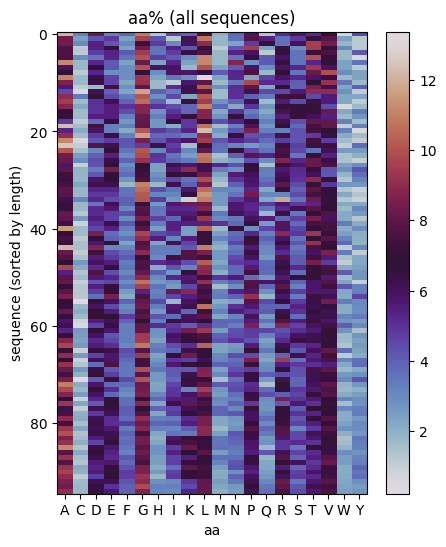

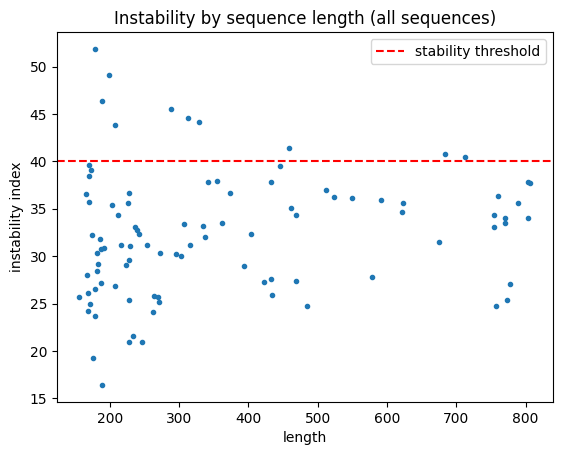

In [12]:
# Plot the composition statistics and the instabilities for all sequences

aa_comp_matrix = DF_SEQ[["p" + aa for aa in AA_LIST]].values
instabilities = DF_SEQ["instability"].values
seq_lengths = DF_SEQ["length"].values
sorted_idxs = np.argsort(seq_lengths)


# Plot composition
fig, ax = plt.subplots(1, 1, figsize=(5, 6))
sc = ax.imshow(aa_comp_matrix[sorted_idxs], aspect="auto", cmap="twilight")
ax.set_xticks(range(len(AA_LIST)), labels=AA_LIST)
ax.set_xlabel(f"aa")
ax.set_ylabel(f"sequence (sorted by length)")
ax.set_title(f"aa% (all sequences)")
fig.colorbar(sc)


# Pot instability
fig, ax = plt.subplots(1, 1)
ax.plot(seq_lengths[sorted_idxs], instabilities[sorted_idxs], '.')
ax.set_xlabel(f"length")
ax.set_ylabel(f"instability index")
ax.set_title(f"Instability by sequence length (all sequences)")
ax.axhline(40, color='r', linestyle="--", label="stability threshold")
ax.legend();


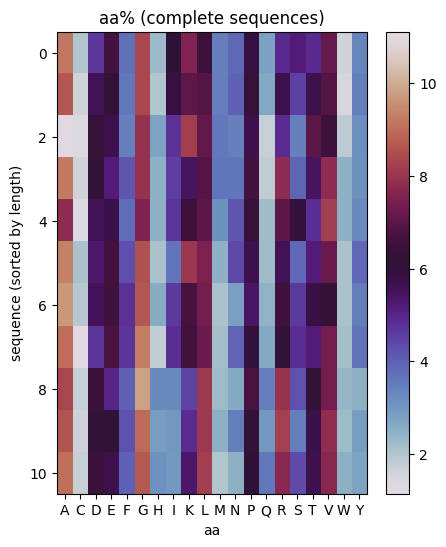

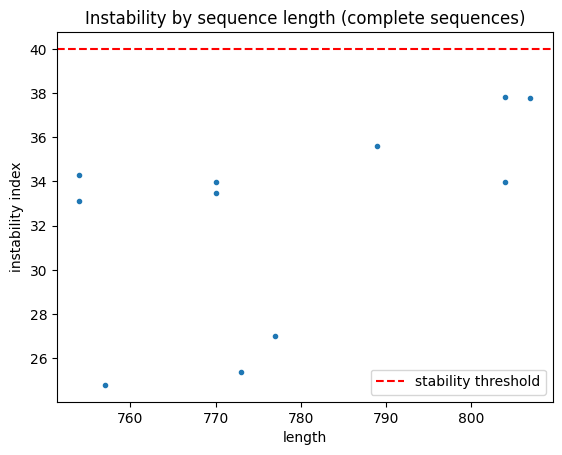

In [13]:
# Plot the composition statistics and the instabilities for all sequences

aa_comp_matrix = COMPLETE_DF[["p" + aa for aa in AA_LIST]].values
instabilities = COMPLETE_DF["instability"].values
seq_lengths = COMPLETE_DF["length"].values
sorted_idxs = np.argsort(seq_lengths)


# Plot composition
fig, ax = plt.subplots(1, 1, figsize=(5, 6))
sc = ax.imshow(aa_comp_matrix[sorted_idxs], aspect="auto", cmap="twilight")
ax.set_xticks(range(len(AA_LIST)), labels=AA_LIST)
ax.set_xlabel(f"aa")
ax.set_ylabel(f"sequence (sorted by length)")
ax.set_title(f"aa% (complete sequences)")
fig.colorbar(sc)


# Pot instability
fig, ax = plt.subplots(1, 1)
ax.plot(seq_lengths[sorted_idxs], instabilities[sorted_idxs], '.')
ax.set_xlabel(f"length")
ax.set_ylabel(f"instability index")
ax.set_title(f"Instability by sequence length (complete sequences)")
ax.axhline(40, color='r', linestyle="--", label="stability threshold")
ax.legend();

### Sequence alignment of long, complete sequences

In [14]:
THRESH = 600  # Length threshold: keep only "long" seqs at least this length

df = COMPLETE_DF.loc[COMPLETE_DF["length"] > THRESH].copy()
df

,aa_sequence,length,start_codon,stop_codon,complete,instability,pA,pC,pD,pE,...,pM,pN,pP,pQ,pR,pS,pT,pV,pW,pY
orf,,,,,,,,,,,,,,,,,,,,,
Soil14.scaffold_111947747_c1_15,MDRRDFLKGTAMAAATLAASRLAYGQDKAAVEPSIAARHGNGVQWH...,807,True,True,True,37.760682,9.057072,1.736973,6.451613,5.707196,...,1.985112,2.481390,6.079404,3.598015,7.692308,4.342432,5.707196,7.692308,2.481390,2.729529
Soil15.scaffold_991210343_c1_3,MDRRDFLKTTAMTAATLAASRLAYGQTPGAAPPAVSAASGGVKWNK...,804,True,True,True,37.831395,8.343711,1.743462,6.475716,4.981320,...,2.241594,2.615193,6.724782,3.486924,7.970112,4.234122,6.102117,7.347447,2.366127,2.490660
Soil15.scaffold_1131791871_c1_2,MERREFLKYSAMGTATVAASRLALGKDAVAAAEAAPVTTDVVWNKA...,804,True,True,True,33.981706,8.592777,1.618929,6.102117,6.102117,...,2.490660,3.486924,6.226650,2.988792,8.219178,3.486924,5.728518,7.845579,2.241594,2.864259
Soil16.scaffold_833218104_c1_9,MKFTRREFLKSMAVATALVSSGCSSDTGGAKMQGPTSQQDVEKWVK...,754,True,True,True,34.295657,9.163347,1.992032,4.648074,6.640106,...,3.452855,3.851262,5.843293,2.788845,4.913679,5.179283,4.913679,7.171315,1.593625,3.320053
Soil16.scaffold_48033301_c1_9,MTRREMLTRMAATAAISAAEAVFPGIVFAAAPDKTFSPSAVEWKKT...,770,True,True,True,33.995202,9.232770,1.560468,6.241873,5.201560,...,3.641092,3.641092,6.631990,1.820546,7.802341,3.901170,5.461638,7.802341,2.470741,3.120936
Soil3.scaffold_374008697_c1_11,MRFSRRDFLKAIAVSTALVSSGCSLDSGGRGMQGPTTQQDVEKWFK...,754,True,True,True,33.105604,8.632138,1.593625,5.577689,6.241700,...,3.452855,3.984064,6.374502,2.656042,5.710491,4.515272,5.710491,6.905710,1.460823,3.452855
Soil5.scaffold_42391532_c1_4,MELSRRSFLQAAAAAAATAAALSATGCADKKANLKSDLPADLKWDK...,757,True,True,True,24.790238,11.111111,1.322751,6.349206,5.687831,...,3.571429,3.439153,5.687831,1.719577,4.894180,3.439153,7.010582,6.481481,1.851852,3.174603
Soil5.scaffold_243654554_c1_4,MGLTRRDFLKATAAAAAFAAAGATALNPLKPGVAEASEGGLEWGKA...,773,True,True,True,25.362578,9.326425,2.072539,5.310881,6.606218,...,2.461140,4.404145,5.699482,2.202073,5.569948,3.886010,5.181347,7.253886,2.072539,3.886010
Soil9.scaffold_399115430_c1_5,MAITRREFLKAAVTIGVATSGGMGAPELLTVSEAEAQQAAESWQKA...,789,True,True,True,35.605863,9.010152,1.142132,4.695431,6.725888,...,2.157360,3.934010,5.964467,2.664975,6.091371,4.822335,5.203046,7.360406,2.157360,3.680203


We'll try out using Biopython's [alignment package](https://biopython.org/docs/dev/Tutorial/chapter_align.html) to do alignment of amino acid sequences.
It looks like there are different predefined scoring methods, and that `blastp` corresponds to a protein alignment scheme.

In [15]:
from Bio.Align import PairwiseAligner

seqs = df['aa_sequence'].values

# Select scoring scheme
# see https://blast.ncbi.nlm.nih.gov/html/sub_matrix.html
aligner = PairwiseAligner(scoring="blastp")
print(aligner)

alignments = [[None for _ in range(len(seqs))] for _ in range(len(seqs))]
similarity_matrix = np.nan * np.ones([len(seqs), len(seqs)])
for i in tqdm.trange(len(seqs)):
    seq1 = seqs[i]
    for j in range(i, len(seqs)):
        seq2 = seqs[j]
        alignment = aligner.align(seq1, seq2)
        alignments[i][j] = alignment
        score = alignment.score
        similarity_matrix[i, j] = score
        similarity_matrix[j, i] = score

# Compute the distance matrix from the similarity matrix
distance_matrix = np.max(similarity_matrix) - similarity_matrix

Pairwise sequence aligner with parameters
  substitution_matrix: <Array object at 0x12f4a5550>
  target_internal_open_gap_score: -12.000000
  target_internal_extend_gap_score: -1.000000
  target_left_open_gap_score: -12.000000
  target_left_extend_gap_score: -1.000000
  target_right_open_gap_score: -12.000000
  target_right_extend_gap_score: -1.000000
  query_internal_open_gap_score: -12.000000
  query_internal_extend_gap_score: -1.000000
  query_left_open_gap_score: -12.000000
  query_left_extend_gap_score: -1.000000
  query_right_open_gap_score: -12.000000
  query_right_extend_gap_score: -1.000000
  mode: global



  0%|          | 0/11 [00:00<?, ?it/s]

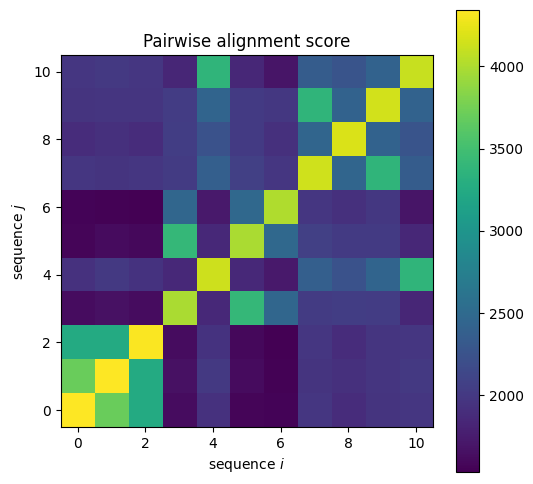

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
sc = ax.imshow(similarity_matrix, aspect="equal", cmap="viridis", origin="lower")
ax.set_xlabel(f"sequence $i$")
ax.set_ylabel(f"sequence $j$")
ax.set_title(f"Pairwise alignment score")
fig.colorbar(sc);

Let's now perform [hierarchical clustering with scipy](https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html#module-scipy.cluster.hierarchy).


In [17]:
import scipy.cluster.hierarchy as sch

# Perform hierarchical clustering
linkage = sch.linkage(
    np.triu(distance_matrix), 
    method='single',
)
SIM_THRESH = 0.7 * np.max(linkage[:,2])

# Determine an ordering through a dendrogram
dendro = sch.dendrogram(
    linkage,
    no_plot=True,
)
order = dendro['leaves']
print("Dendrogram ordering:", order)

# Cluster sequences based on linkages
cluster_labels = sch.fcluster(
    linkage, 
    t=SIM_THRESH, 
    criterion='distance'
)

print("Cluster assignments:")
print("--------------------")
for i in range(5):
    print(f"Sequence {i} → Cluster {cluster_labels[i]}")
print("...")

# Reorder the similarity matrix
ordered_similarity_matrix = similarity_matrix[np.ix_(order, order)]
ordered_cluster_labels = cluster_labels[order]

# Store computed cluster in dataframe
df.loc[:,"cluster"] = cluster_labels
df.head()

Dendrogram ordering: [2, 0, 1, 4, 7, 8, 9, 10, 3, 5, 6]
Cluster assignments:
--------------------
Sequence 0 → Cluster 1
Sequence 1 → Cluster 1
Sequence 2 → Cluster 1
Sequence 3 → Cluster 4
Sequence 4 → Cluster 5
...


,aa_sequence,length,start_codon,stop_codon,complete,instability,pA,pC,pD,pE,...,pN,pP,pQ,pR,pS,pT,pV,pW,pY,cluster
orf,,,,,,,,,,,,,,,,,,,,,
Soil14.scaffold_111947747_c1_15,MDRRDFLKGTAMAAATLAASRLAYGQDKAAVEPSIAARHGNGVQWH...,807,True,True,True,37.760682,9.057072,1.736973,6.451613,5.707196,...,2.481390,6.079404,3.598015,7.692308,4.342432,5.707196,7.692308,2.481390,2.729529,1
Soil15.scaffold_991210343_c1_3,MDRRDFLKTTAMTAATLAASRLAYGQTPGAAPPAVSAASGGVKWNK...,804,True,True,True,37.831395,8.343711,1.743462,6.475716,4.981320,...,2.615193,6.724782,3.486924,7.970112,4.234122,6.102117,7.347447,2.366127,2.490660,1
Soil15.scaffold_1131791871_c1_2,MERREFLKYSAMGTATVAASRLALGKDAVAAAEAAPVTTDVVWNKA...,804,True,True,True,33.981706,8.592777,1.618929,6.102117,6.102117,...,3.486924,6.226650,2.988792,8.219178,3.486924,5.728518,7.845579,2.241594,2.864259,1
Soil16.scaffold_833218104_c1_9,MKFTRREFLKSMAVATALVSSGCSSDTGGAKMQGPTSQQDVEKWVK...,754,True,True,True,34.295657,9.163347,1.992032,4.648074,6.640106,...,3.851262,5.843293,2.788845,4.913679,5.179283,4.913679,7.171315,1.593625,3.320053,4
Soil16.scaffold_48033301_c1_9,MTRREMLTRMAATAAISAAEAVFPGIVFAAAPDKTFSPSAVEWKKT...,770,True,True,True,33.995202,9.232770,1.560468,6.241873,5.201560,...,3.641092,6.631990,1.820546,7.802341,3.901170,5.461638,7.802341,2.470741,3.120936,5


In [18]:
for idx in order[0:5]:
    print(f"Seq {idx} (cluster {cluster_labels[idx]}):", df.iloc[idx]['aa_sequence'])

Seq 2 (cluster 1): MERREFLKYSAMGTATVAASRLALGKDAVAAAEAAPVTTDVVWNKAPCRFCGTGCHVQVGVKGGRVVAVAGDQSADVNKGLLCVKGYHVGLALYGKDRLTRPLLRKNGKLEPIGWDEAIEIIARRAMQNPAGFALYGSGQWTIPEGYAANKLVKAGLGNNQIDPNARLCMASAVTGFLSTYGVDEPAGCYEDLDRCDVLLMWGNNPAEMHPVLFSRVVDRRSRGEQVLLIDLTTRRTRTSAFCQHTLYFKPNTDLAIANGIAHLLVERGTFDRAFVEKFCNFRQRTEHPTLDGRPMTFEEYRKALAEYTPERVEALSGVAAKDIRMLADLFGRRDLRITSLWCMGMNQHTRGTAINDLVHGVHLLSGHFGKPGDAPTSLTGQPSACGTVREVGTVANGLPGGLVVTNGEHRQKAEHLWNLPEGRINPKPGYHAVELWKRFSTPKEQGGDIDTVWVMVTNPGQSLPNTNELFDPSRKIPGKFLIVSDVYPTATVRAADLVLPSAMWVEKNGMFGNSERRTQQWFKMVNPPGEARDDGWQIIAVARKLHDMGFAGMKDKDGRFLFDIRKDGKEVPAWDHRHYYDVNVDEHLFEEYRKFTRFKHKDLAPYGEYVKARGLRWPVVEQPDGSWRETRFRFSKFDDPYVTGGEIQFYHSVTRDDRALVWFHPYEPPPESPDADYPFWLCTGRVLEHWHTGSLTMRIPQLQRAMPQSYLEMNREDARKLGVADGEVVILESRRGALELPVWIEGRGAPAPGTVFVPFFDETVMVNRATLEAHDPLSKQPDYKKCAVRIRRKPQGTQGEAR*
Seq 0 (cluster 1): MDRRDFLKGTAMAAATLAASRLAYGQDKAAVEPSIAARHGNGVQWHKAPCRFCGTGCHVQVGVQSGKVVAIAGDQKAPVNKGLLCVKGYHVGLALYGQDRLTTPLLRKGDRQVPISWEEAIDLIARRVLKDPKGFAVYGSGQWTIPEGYAASKFVKA

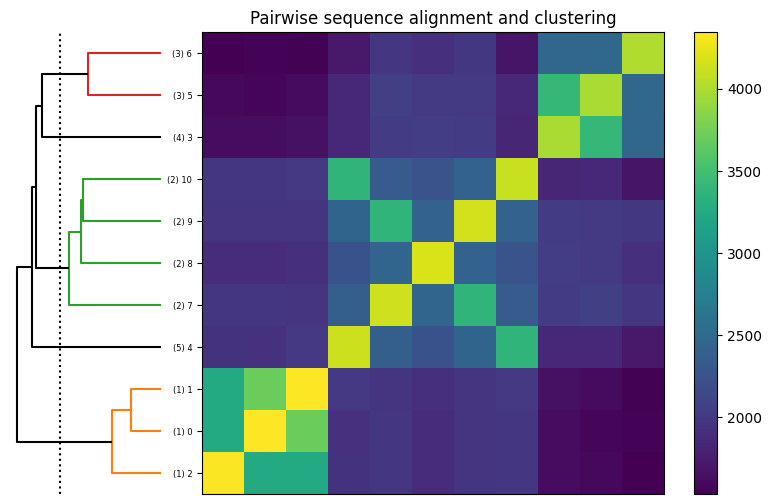

In [19]:
fig = plt.figure(figsize=(10, 6))

gs = gridspec.GridSpec(1, 2, width_ratios=[1, 4], wspace=0.05)
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])

# Plot dendrogram
dendro = sch.dendrogram(
    linkage, 
    orientation="left",
    no_labels=True,
    color_threshold=SIM_THRESH,
    above_threshold_color='k',
    ax=ax0, 
)
assert np.allclose(order, dendro["leaves"]), "Order changed!"
ax0.axvline(SIM_THRESH, color='k', linestyle=':')
ax0.axis('off')

# Plot similarity matrix
# to_plot = ordered_similarity_matrix.copy()
# np.fill_diagonal(to_plot, np.nan)
to_plot = ordered_similarity_matrix
sc = ax1.imshow(
    to_plot, 
    aspect="equal", 
    cmap="viridis", 
    origin="lower"
)

fig.colorbar(sc)
ax1.set_title(f"Pairwise sequence alignment and clustering");
ax1.set_xticks([]);
ax1.set_yticks(
    range(len(seqs)), 
    labels=[f"({c}) {i}" for c, i in zip(ordered_cluster_labels, order)], 
    fontsize=6
);

### Save output

In [20]:
np.savetxt(f"{OUTDIR}/long_complete_orf_ids.txt", 
           df.index.values, "%s")
np.savetxt(f"{OUTDIR}/long_complete_aa_seqs.txt", 
           [s[0:-1] for s in df.aa_sequence.values], "%s")
np.save(f"{OUTDIR}/long_complete_pwalignment_scores.npy", similarity_matrix)
df.to_csv(f"{OUTDIR}/long_complete_dataframe.csv")
np.savetxt(f"{OUTDIR}/length_threshold.txt", [THRESH], "%d")

In [21]:
# Save fasta files for sequences
records = []
for idx, row in df.iterrows():
    seq = row["aa_sequence"][0:-1]
    id = str(idx)
    record = SeqRecord(Seq(seq), id=id, name=id, description="")
    records.append(record)
    
SeqIO.write(records, f"{OUTDIR}/long_complete_aa_seqs.fasta", "fasta")

11

We now save single-sequence fasta files in a subdirectory for alphafold2.

In [22]:
# Save fasta files for sequences

records = []
for idx, row in df.iterrows():
    seq = row["aa_sequence"][0:-1]
    id = str(idx)
    record = SeqRecord(Seq(seq), id=id, name=id, description="")
    records.append(record)

NFILES_PER_AF_BATCH = 6
subdir = f"{OUTDIR}/alphafold_batches_{KO_NUMBER}_complete"
os.makedirs(subdir, exist_ok=True)
counter = 1
for i, record in enumerate(records):
    if i % NFILES_PER_AF_BATCH == 0:
        outdir = f"{subdir}/alphafold_{KO_NUMBER}_complete_batch{counter}"
        counter += 1
    os.makedirs(outdir, exist_ok=True)
    SeqIO.write(record, f"{outdir}/{record.id}.fasta", "fasta")

## Mapping incomplete sequences to complete ones

Now, we take all short or incomplete sequences and map them to each of the long complete sequences. 

In [23]:
target_df = COMPLETE_DF.loc[COMPLETE_DF["length"] > THRESH]
query_df = DF_SEQ[
    (~DF_SEQ["complete"]) | (DF_SEQ["length"] < THRESH)
]

target_seqs = target_df['aa_sequence'].to_numpy()
query_seqs = query_df["aa_sequence"].to_numpy()

target_orfs = target_df.index.values
query_orfs = query_df.index.values

ntargets = len(target_seqs)
nqueries = len(query_seqs)

print(f"{ntargets} target sequences (long and complete)")
print(f"{nqueries} query sequences (short or incomplete)")

assert len(DF_SEQ) == ntargets + nqueries, "Lengths don't add to total!"

11 target sequences (long and complete)
84 query sequences (short or incomplete)


In [24]:
aligner = PairwiseAligner(scoring="blastp", mode="local")
print(aligner)

scores = np.zeros([nqueries, ntargets])
for target_idx in tqdm.trange(ntargets, desc="target sequence"):
    target_seq = target_seqs[target_idx]
    for query_idx in range(nqueries):
        query_seq = query_seqs[query_idx]
        score = aligner.score(query_seq, target_seq)
        scores[query_idx, target_idx] = score

np.save(f"{OUTDIR}/incomplete_vs_complete_alignment_scores.npy", scores)

Pairwise sequence aligner with parameters
  substitution_matrix: <Array object at 0x14fba3750>
  target_internal_open_gap_score: -12.000000
  target_internal_extend_gap_score: -1.000000
  target_left_open_gap_score: -12.000000
  target_left_extend_gap_score: -1.000000
  target_right_open_gap_score: -12.000000
  target_right_extend_gap_score: -1.000000
  query_internal_open_gap_score: -12.000000
  query_internal_extend_gap_score: -1.000000
  query_left_open_gap_score: -12.000000
  query_left_extend_gap_score: -1.000000
  query_right_open_gap_score: -12.000000
  query_right_extend_gap_score: -1.000000
  mode: local



target sequence:   0%|          | 0/11 [00:00<?, ?it/s]

In [25]:
# Normalize scores by query length
scores_normalized = scores / query_df.length.values[:,None]

In [26]:
best_match_idxs = np.argmax(scores, axis=1)
best_match_orfs = target_orfs[best_match_idxs]
best_match_scores = np.zeros(nqueries)
with open(f"{OUTDIR}/incomplete_to_complete_seq_mapping.tsv", "w") as f:
    f.write("query (incomplete)\ttarget (complete)\tscore\n", )
    for i in range(nqueries):
        q_orf = query_orfs[i]
        t_orf = best_match_orfs[i]
        score = scores_normalized[i,best_match_idxs[i]]
        best_match_scores[i] = score
        f.write(f"{q_orf}\t{t_orf}\t{score}\n")


In [27]:
# Save top alignments

with open(f"{OUTDIR}/incomplete_to_complete_top_alignments.txt", "w") as f:
    for i in range(nqueries):
        q_orf = query_orfs[i]
        t_orf = best_match_orfs[i]
        query_seq = query_seqs[i]
        target_seq = target_seqs[best_match_idxs[i]]
        score = scores_normalized[i,best_match_idxs[i]]
        # Realign to save alignment
        alignment = aligner.align(query_seq, target_seq)[0]
        f.write(f"query={q_orf}\ntarget={t_orf}\nscore={score}\n\n")
        f.write(str(alignment) + "\n\n")


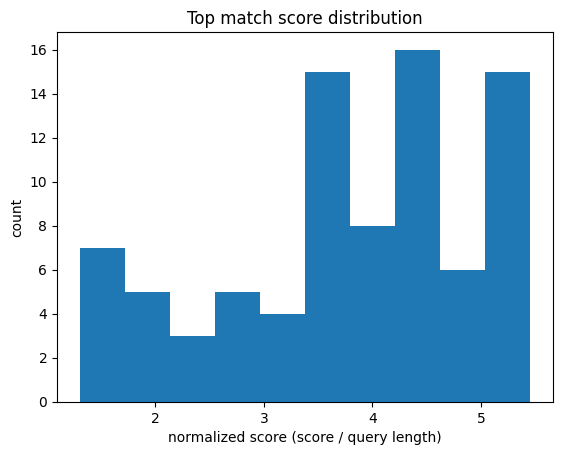

In [28]:
fig, ax = plt.subplots(1, 1)
ax.hist(best_match_scores)
ax.set_xlabel(f"normalized score (score / query length)")
ax.set_ylabel(f"count")
ax.set_title(f"Top match score distribution");


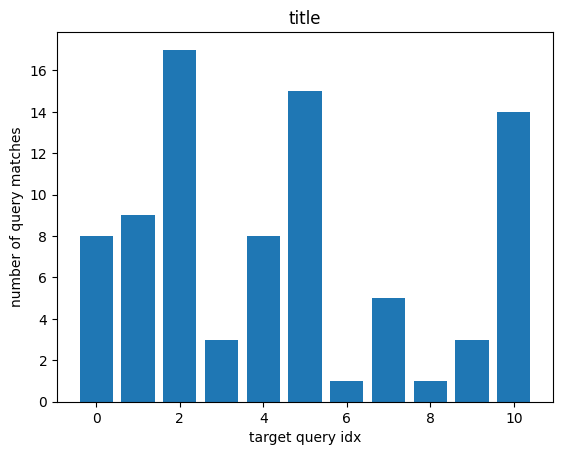

In [29]:
from collections import Counter

fig, ax = plt.subplots(1, 1)

counts = Counter(best_match_idxs)
x = np.arange(ntargets)
y = [counts[i] for i in x]

plt.bar(x, y)

ax.set_xlabel(f"target query idx")
ax.set_ylabel(f"number of query matches")
ax.set_title(f"title");
